CSE 519: DATA SCIENCE FUNDAMENTAL 
HOMEWORK:3
TEAM MEMBERS: 
RIDDHI REX ANTONYREX(SBU ID:111464274)
ADITYA SRIVASTAVA(SBU ID:111424337)
NEHA INDRANIYA(111499447)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.metrics.pairwise import paired_distances, euclidean_distances


In [2]:
#Q1 
import datetime
import seaborn as sns
from sklearn import datasets
import math
from numpy.random import permutation
df = pd.read_csv("properties_2017.csv")
df_train = pd.read_csv("train_2017.csv")
df_sample = pd.read_csv("sample_submission.csv")
df_train['transactiondate'] = pd.to_datetime(df_train['transactiondate'])
check_date= datetime.date(2017,12,1)


In [66]:

df_score = pd.DataFrame({'roomcnt':df['roomcnt'],'bedroomcnt':df['bedroomcnt'],'bathroomcnt':df['bathroomcnt'],'parcelid':df['parcelid'], 'finishedsquarefeet15':df['finishedsquarefeet15'], 'poolcnt':df['poolcnt'], 'numberofstories':df['numberofstories'], 'garagecarcnt':df['garagecarcnt'], 'fireplacecnt':df['fireplacecnt']})
df_score = df_score[np.isfinite(df['finishedsquarefeet15'])]

df_score['roomcnt'] = df_score['roomcnt'].fillna(0)
df_score['bathroomcnt'] = df_score['bathroomcnt'].fillna(0)
df_score['bedroomcnt'] = df_score['bedroomcnt'].fillna(0)
df_score['garagecarcnt'] = df_score['garagecarcnt'].fillna(0)
df_score['fireplacecnt'] = df_score['fireplacecnt'].fillna(0)
df_score['poolcnt'] = df_score['poolcnt'].fillna(0)
df_score['numberofstories'] = df_score['numberofstories'].fillna(0)

# z-score calculation
df_score['finishedsquarefeet15'] = (df_score.finishedsquarefeet15 - df_score.finishedsquarefeet15.mean())/df_score.finishedsquarefeet15.std(ddof=0)

df_score['roomcnt'] =  (df_score.roomcnt - df_score.roomcnt.mean())/df_score.roomcnt.std(ddof=0)
df_score['bedroomcnt'] =  (df_score.bedroomcnt - df_score.bedroomcnt.mean())/df_score.bedroomcnt.std(ddof=0)
df_score['bathroomcnt'] =  (df_score.bathroomcnt - df_score.bathroomcnt.mean())/df_score.bathroomcnt.std(ddof=0)
df_score['garagecarcnt'] =  (df_score.garagecarcnt - df_score.garagecarcnt.mean())/df_score.garagecarcnt.std(ddof=0)
df_score['fireplacecnt'] =  (df_score.fireplacecnt - df_score.fireplacecnt.mean())/df_score.fireplacecnt.std(ddof=0)
df_score['poolcnt'] =  (df_score.poolcnt - df_score.poolcnt.mean())/df_score.poolcnt.std(ddof=0)
df_score['numberofstories'] =  (df_score.numberofstories - df_score.numberofstories.mean())/df_score.numberofstories.std(ddof=0)

# scoring function :
df_score['score'] = ((15*(df_score['roomcnt']))+(20*df_score['bedroomcnt'])+(10*df_score['bathroomcnt'])+(12*df_score['poolcnt']) + (df_score['finishedsquarefeet15']) + (df_score['garagecarcnt']*8) + (df_score['fireplacecnt']*8) + (df_score['numberofstories']*10))

print("Top Ten Desirable Houses:")
df_score = df_score.sort_values('score',ascending=False)
print(df_score[['parcelid']].head(10))

print("\n Least Ten Desirable Houses:")
df_score = df_score.sort_values('score',ascending=True)
print (df_score[['parcelid']].head(10))


Top Ten Desirable Houses:
         parcelid
2282638  17231357
433638   17231359
1716364  17231356
1984665  17231367
2550914  17231368
1417843  17231366
1567132  17231361
135125   17231369
2849047  17231358
284232   17231364

 Least Ten Desirable Houses:
         parcelid
13696    11884094
552099   17053084
1178239  17114426
1417100  17059642
1894534  17077102
2668301  12561463
1805211  17072268
2057394  12561815
2281885  17101900
614689   11244377


# Scoring Function

We know that Scoring Functions are measures that reduce multi-dimension data to single value, to highlight some particular property. So, in this question, we are reducing the multidimensional data of houses to find a score that highlight a property of desirability of that house.
To find the scoring function, we filtered out some variables from the set provided in the data. Logic behind filtering out is that we want to generate the scoring function out of that variable which will make the house stand out of others. For example, if we are going to buy a house, we will look for some property which will make that house suitable for me. These properties may vary from person to person. So, to make this property selection uniform, we took a poll among ten people, about what features they look for when they are going to buy a house. Next, we took intersection of the poll result to get the most common feature of the house. Then, we have given weights to the property to compute the scoring function. Weights are assigned in accordance to the importance of that property. The main aim of this step is to vary the significance of the property in the scoring function.
The variables used in our function are:

1-	“finishedsqaurefeet15” – This denotes total area. The most common for a house- ‘how big it is?’ The size of house determines its desirability on a greater extent and hence plays a vital role in determining the price of that house. No weight is assigned to this variable, because value of this property is already very high making high contribution to the scoring function. 

2-	“roomcnt” – Total rooms in that house. This property is related to the previous property. As how many rooms are built in that area. A bigger house with more number of rooms of normal size is more desirable than a bigger house with less number of large rooms. Weight assigned to this variable is 15.

3-	“bedroomcnt” – Number of bedrooms in house. Out of the total rooms in the house, the number of bedrooms present. For a non-commercial building, this is one of the property that makes a house desirable. Weight assigned to this variable is 20.

4-	“bathroomcnt” -   Number of bathrooms in the house. A house to be called desirable should have number of bathroom not more than number of rooms as then space utilised by them will be mostly waste and not less than the half the number of rooms in the house. We have assigned 10 as weight to this variable.

5-	“numberofstories” – Number of stories a house has also plays a key role in deciding its desirability. Weight assigned to this property is 10.

6-	“Poolcnt” – Pool count can represent a luxury quotient of a house. As a result this property makes a house desirable.

7-	“fireplacecnt” and “garagecnt”– fire place count and garagecnt has same weight in the scoring function given below:

Scoring Function :

Score = 15*roomcnt + 20*bedroomcnt + 10* bathroomcnt + 12*poolcnt + finishedsquarearea15 + 8* garagecnt + 8* fireplacecnt + 10*numberofstories  


In [11]:
#Q2 Data preprocessing
dff = pd.read_csv("C:\Study\DSF\Homework\HW3\data\properties_2017.csv")
print(dff.head())
print(dff.shape)

   parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                    NaN                       NaN           NaN   
1  10759547                    NaN                       NaN           NaN   
2  10843547                    NaN                       NaN           NaN   
3  10859147                    NaN                       NaN           NaN   
4  10879947                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  5.0                    NaN   
3          0.0         0.0                  3.0                    6.0   
4          0.0         0.0                  4.0                    NaN   

   calculatedbathnbr  decktypeid         ...           numberofstories  \
0           

In [12]:
print dff.head(0)

Empty DataFrame
Columns: [parcelid, airconditioningtypeid, architecturalstyletypeid, basementsqft, bathroomcnt, bedroomcnt, buildingclasstypeid, buildingqualitytypeid, calculatedbathnbr, decktypeid, finishedfloor1squarefeet, calculatedfinishedsquarefeet, finishedsquarefeet12, finishedsquarefeet13, finishedsquarefeet15, finishedsquarefeet50, finishedsquarefeet6, fips, fireplacecnt, fullbathcnt, garagecarcnt, garagetotalsqft, hashottuborspa, heatingorsystemtypeid, latitude, longitude, lotsizesquarefeet, poolcnt, poolsizesum, pooltypeid10, pooltypeid2, pooltypeid7, propertycountylandusecode, propertylandusetypeid, propertyzoningdesc, rawcensustractandblock, regionidcity, regionidcounty, regionidneighborhood, regionidzip, roomcnt, storytypeid, threequarterbathnbr, typeconstructiontypeid, unitcnt, yardbuildingsqft17, yardbuildingsqft26, yearbuilt, numberofstories, fireplaceflag, structuretaxvaluedollarcnt, taxvaluedollarcnt, assessmentyear, landtaxvaluedollarcnt, taxamount, taxdelinquencyfl

In [15]:
df1.fillna(df1.mean(), inplace=True)
filename = 'cleannewX.csv'
df1.to_csv(filename, index=False)

print(df1.head(2))

   parcelid  basementsqft  bathroomcnt  bedroomcnt  \
0  10754147    647.220652          0.0         0.0   
1  10759547    647.220652          0.0         0.0   

   calculatedfinishedsquarefeet  finishedsquarefeet15  finishedsquarefeet50  \
0                   1831.455292           2754.869233           1392.029093   
1                   1831.455292           2754.869233           1392.029093   

   fireplacecnt  garagecarcnt  garagetotalsqft  lotsizesquarefeet  poolcnt  \
0      1.168959      1.826581        383.15622            85768.0      1.0   
1      1.168959      1.826581        383.15622             4083.0      1.0   

   poolsizesum  roomcnt    yearbuilt  numberofstories    taxamount  
0    519.71543      0.0  1964.437713         1.400956  5408.948842  
1    519.71543      0.0  1964.437713         1.400956  5408.948842  


In [35]:
#Q2:

n = 2985217 #number of rows in the file
s = 2000 #desired sample size
skip = sorted(random.sample(range(n),n-s))
cols = ['parcelid', 'bathroomcnt', 'bedroomcnt', 'fireplacecnt','garagecnt','poolcnt','roomcnt','yearbuilt','numberofstories']

dft1 = pd.read_csv("cleannewX.csv", skiprows = skip, usecols=[0,2,3,7,8,11,13,14,15], header=None, names=cols)
dft2 = pd.read_csv("minimalset1.csv")
df1 = pd.merge(dft1, dft2, on='parcelid', how='inner')
print(df1.head())

   parcelid  bathroomcnt  bedroomcnt  fireplacecnt  garagecnt     poolcnt  \
0  17297395          2.5         3.0      1.000000   2.000000  34168996.0   
1  12176933          3.0         5.0      1.168959   1.826581  34221442.0   
2  13018135          2.0         2.0      1.168959   1.826581  34128565.0   
3  14019991          2.5         3.0      1.168959   2.000000  33679178.0   
4  14222785          2.0         4.0      1.000000   2.000000  33818107.0   

   roomcnt  yearbuilt  numberofstories   latitude   longitude  
0      1.0  519.71543              6.0  34.168996 -118.764857  
1      1.0  519.71543              0.0  34.221442 -118.205535  
2      1.0  519.71543              0.0  34.128565 -117.896725  
3      1.0  519.71543              7.0  33.679178 -117.930285  
4      1.0  519.71543              7.0  33.818107 -117.830004  


In [36]:
def normalize(df1):
    result = pd.DataFrame()
    result = df1.copy()
    for feature_name in df1.columns:
        max_value = df1[feature_name].max()
        min_value = df1[feature_name].min()
        result[feature_name] = (df1[feature_name] - min_value) / (max_value - min_value)
    return result
df12 = pd.DataFrame()
df12 = normalize(df1)
print(df12.head(5))

   parcelid  bathroomcnt  bedroomcnt  fireplacecnt  garagecnt   poolcnt  \
0  0.041944     0.277778    0.333333      0.000000   0.250000  0.562368   
1  0.009325     0.333333    0.555556      0.084479   0.228323  0.597970   
2  0.014684     0.222222    0.222222      0.084479   0.228323  0.534922   
3  0.021066     0.277778    0.333333      0.084479   0.250000  0.229863   
4  0.022358     0.222222    0.444444      0.000000   0.250000  0.324172   

   roomcnt  yearbuilt  numberofstories  latitude  longitude  
0      NaN    0.67221         0.500000  0.562368   0.352274  
1      NaN    0.67221         0.000000  0.597970   0.655175  
2      NaN    0.67221         0.000000  0.534922   0.822411  
3      NaN    0.67221         0.583333  0.229863   0.804236  
4      NaN    0.67221         0.583333  0.324172   0.858543  


In [37]:
dist_mat = [[0 for x in range(s+1)] for y in range(s+1)]


In [73]:
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(df1, df1)
print(dist)x = -1
y = -1
numcols = len(df1.columns)-1
for index, row in df1.iterrows():
    x = x+1
    y = -1
    for index, rows in df1.iterrows():
        y = y+1
        row_distance = 0
        for i in range(1,numcols):
             row_distance = row_distance + abs(row.iloc[i]-rows.iloc[i])
        dist_mat[x][y] = round(row_distance, 2)

print(np.matrix(dist_mat))

[[  0.    38.     9.   ...,  21.17  12.    16.16]
 [ 38.     0.    45.   ...,  29.17  38.    25.22]
 [  9.    45.     0.   ...,  28.17  17.    23.35]
 ..., 
 [ 21.17  29.17  28.17 ...,   0.    11.17   5.45]
 [ 12.    38.    17.   ...,  11.17   0.    13.4 ]
 [ 16.16  25.22  23.35 ...,   5.45  13.4    0.  ]]


In [40]:
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(df1, df1)
print(dist)

[[       0.          5120730.58033719  4279450.99439157 ...,
   2673308.57177576  5580323.13050084  4533867.15941466]
 [ 5120730.58033719        0.           846313.73730018 ...,
   2462278.19355049   507563.44036115   629446.11168809]
 [ 4279450.99439157   846313.73730018        0.         ...,
   1616233.84759949  1304763.87684487   281868.08349874]
 ..., 
 [ 2673308.57177576  2462278.19355049  1616233.84759949 ...,        0.
   2909758.99999991  1862720.99999987]
 [ 5580323.13050084   507563.44036115  1304763.87684487 ...,
   2909758.99999991        0.          1047037.99999976]
 [ 4533867.15941466   629446.11168809   281868.08349874 ...,
   1862721.00000013  1047038.00000024        0.        ]]


In [198]:
#Q3

def kMedoidsAlgo(D, k, maxIterations=100):
    m, n = D.shape
    
    # randomly initialize an array of k medoid indices
    M = np.arange(n)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mtemp = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in xrange(maxIterations):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)

        for ka in range(k):
            C[ka] = np.where(J==ka)[0]
        # update cluster medoids
        for ka in range(k):
            J = np.mean(D[np.ix_(C[ka],C[ka])],axis=1)
            j = np.argmin(J)
            Mtemp[ka] = C[ka][j]
        np.sort(Mtemp)
        # check for convergence
        
        if np.array_equal(M, Mtemp):
            break
        M = np.copy(Mtemp)
 
    return M, C

#Inputs for clustering algo
dataInput=dist_mat
k=15
M, C = kMedoidsAlgo(np.matrix(dataInput), k)

print('k-medoids:')
print(M)
col4='garagecnt'

print('clustering result(ith clusters vs data-points for the cluster):')
print(np.matrix(C))

k-medoids:
[1179  274  861  547  906  122   80  771   87 1607  250   67   98 1799    3]
clustering result(ith clusters vs data-points for the cluster):
[[ {0: array([   0,   11,   14,   26,   36,   40,   48,   52,   70,   72,   93,
        100,  125,  154,  177,  182,  189,  195,  210,  226,  231,  244,
        264,  272,  275,  280,  283,  285,  286,  304,  305,  328,  363,
        369,  376,  389,  391,  399,  413,  416,  429,  453,  478,  493,
        495,  496,  498,  507,  510,  531,  536,  542,  545,  553,  559,
        564,  578,  595,  622,  647,  649,  669,  674,  698,  711,  721,
        725,  732,  738,  747,  749,  750,  764,  786,  789,  799,  818,
        827,  857,  866,  869,  880,  882,  895,  900,  903,  922,  939,
        955,  960,  971,  972,  973,  983,  986,  987, 1021, 1035, 1043,
       1059, 1061, 1067, 1071, 1079, 1111, 1120, 1127, 1139, 1158, 1172,
       1179, 1181, 1198, 1213, 1242, 1249, 1269, 1272, 1276, 1283, 1312,
       1323, 1324, 1333, 1347, 1348, 1

[[530 761 298 267 581 159 420 404 611 635 450 168 264 218 902]]


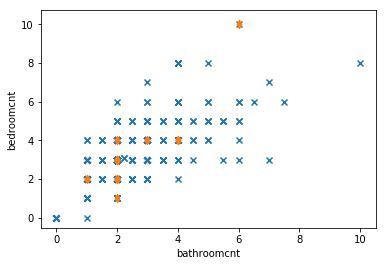

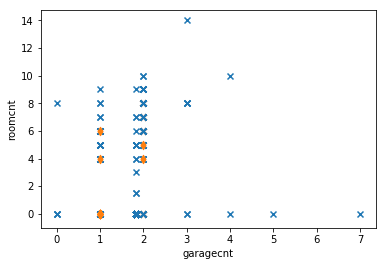

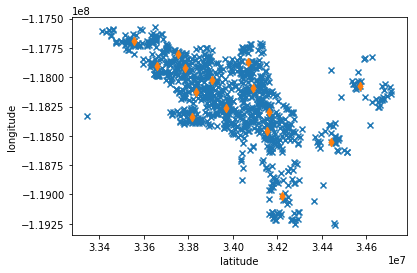

In [228]:
import matplotlib.pyplot as plt
import numpy as np

myMat=np.matrix(M)

#'parcelid', 'bathroomcnt', 'bedroomcnt', 'fireplacecnt','garagecnt','poolcnt','roomcnt','yearbuilt','numberofstories'
col1='bathroomcnt'
col2='bedroomcnt'
col3='fireplacecnt'
col4='garagecnt'
col5='poolcnt'
col6='roomcnt'
col7='yearbuilt'
col8='latitude'
col9='longitude'

print(myMat)

x=col1
y=col2
a=df1[x]
b=df1[y]
c = np.arange(k)
d = np.arange(k)
for kappa in range(k):
            c[kappa] = df1[x][M[kappa]]
            d[kappa] = df1[y][M[kappa]]

plt.scatter(a,b, marker='x')
plt.scatter(c,d, marker='d')
plt.xlabel(x)
plt.ylabel(y)
plt.show()


x=col4
y=col6
a=df1[x]
b=df1[y]
c = np.arange(k)
d = np.arange(k)
for kappa in range(k):
            c[kappa] = df1[x][M[kappa]]
            d[kappa] = df1[y][M[kappa]]

plt.scatter(a,b, marker='x')
plt.scatter(c,d, marker='d')
plt.xlabel(x)
plt.ylabel(y)
plt.show()

x=col8
y=col9
a=df1[x]
b=df1[y]
c = np.arange(k)
d = np.arange(k)
for kappa in range(k):
            c[kappa] = df1[x][M[kappa]]
            d[kappa] = df1[y][M[kappa]]

plt.scatter(a,b, marker='x')
plt.scatter(c,d, marker='d')
plt.xlabel(x)
plt.ylabel(y)
plt.show()

Report on Clustering

Clustering
There are times when we need to group the data-points. It is done through unsupervised learning algorithms comely known as clustering. In this groups are formed based on similar traits and features. These groups are known as Clusters.

Clustering algorithms
There are many clustering algorithm. For this question we initially have tried to use algorithm called as K-means. It initially takes K random centroids. Then checks if any point is closest to that or not. If it is then it belongs to that cluster. K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) choosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

But, K-means is not very good with converge – we can only use it when distances are consistent with the mean. And here, we have the distance function implemented in question no two. So, instead of k-means, k-medoids will suit better as it clusters is based on the similarity measure.

Secondly, the medoid as used by k-medoids is roughly comparable to the median (in fact, there also is k-medians, which is like K-means but for Manhattan distance). Medians are more robust to outliers than the arithmetic mean. Essentially, these explanations and examples will also hold for the medoid. It is a more robust estimate of a representative point than the mean as used in k-means.

Cons of using k-medoids
The performace of k-medoids is not as good as K-means:-
k-medoids =O(n^2*k*i); 
k-means = O(n*k*i)
where usually, 
k times the number of iterations is k*i << n
n=data size
i=features

Finding Optimal k
We can determine optimal K using technique called elbow method. In that for every k distortotion is calculated and a plot is constructed for k vs distortion. And, as K increases the centroids are closer to clusters centroids. The improvements will decline at some point rapidly creating the elbow shape. That is where optimized K lies.

Here in our case, the optimal value of K is 15.

Following are the three clustering plots.
1.) bathroom count vs bedroom count
2.) pool count vs room count
3.) latitude vs longitude

Dots in blue are the data points and dots in orange are the cluster points.

In [6]:
#Q4
df1 = pd.read_csv("properties_2017.csv", usecols=[0, 24, 25])
print(df1.shape)

(2985217, 3)


In [12]:
n = 2985217 #number of records in file
s = 100000 #desired sample size
skip = sorted(random.sample(range(n),n-s))
cols = ['parcelid', 'latitude', 'longitude']

df1 = pd.read_csv("properties_2017.csv", skiprows = skip, usecols=[0, 24, 25], header=None, names=cols)
print(df1.shape)
df1.fillna(df1.median(), inplace=True)


(100001, 3)


,parcelid,latitude,longitude
0,11073947,34265214.0,-118520217.0
1,11114347,34447747.0,-118565056.0
2,11488147,33879216.0,-118361434.0
3,12111347,34144225.0,-118132334.0
4,12322547,33906779.0,-118177023.0
5,12649147,33729436.0,-118292194.0
6,13114547,34189273.0,-118545075.0
7,13116747,34248085.0,-118582132.0
8,13118747,34418546.0,-118447357.0
9,13127147,33820454.0,-118217277.0


In [13]:
filename = 'minimalset.csv'
df1.to_csv(filename, index=False)
print(df1.head())


   parcelid    latitude    longitude
0  11073947  34265214.0 -118520217.0
1  11114347  34447747.0 -118565056.0
2  11488147  33879216.0 -118361434.0
3  12111347  34144225.0 -118132334.0
4  12322547  33906779.0 -118177023.0


In [14]:
df1 = pd.read_csv("minimalset.csv")
df_new = df1.drop('parcelid', 1)
df2 = pd.DataFrame()

for index, row in df_new.iterrows():
    row['latitude'] = row['latitude']/1000000
    row['longitude'] = row['longitude']/1000000

df_new.insert( 0,'parcelid', df1['parcelid'])
print(df_new.head())

filename = 'minimalset1.csv'
df_new.to_csv(filename, index=False)


   parcelid   latitude   longitude
0  11073947  34.265214 -118.520217
1  11114347  34.447747 -118.565056
2  11488147  33.879216 -118.361434
3  12111347  34.144225 -118.132334
4  12322547  33.906779 -118.177023


In [15]:
#Finding the range of latitude and longitude
min_lat = min(df_new['latitude'])
max_lat = max(df_new['latitude'])
min_long = min(df_new['longitude'])
max_long = max(df_new['longitude'])
print(min_lat, max_lat)
print(min_long, max_long)

(33.339384000000003, 34.819602000000003)
(-119.47497300000001, -117.554372)


In [16]:
df_new = pd.read_csv("minimalset1.csv")
print(df_new.head(5))

   parcelid   latitude   longitude
0  11073947  34.265214 -118.520217
1  11114347  34.447747 -118.565056
2  11488147  33.879216 -118.361434
3  12111347  34.144225 -118.132334
4  12322547  33.906779 -118.177023


In [17]:

import reverse_geocode

coord = []
city = []
location = []
count = 0

for index, row in df_new.iterrows():
    coord.append((row['latitude'], row['longitude']))
    count = count+1
location.append(reverse_geocode.search(coord[:count-2]))

for i in location:
    for j in i:
        city.append(j['city'])

print(city)
dfcity = pd.DataFrame()
dfcity['city'] = city


['Northridge', 'Santa Clarita', 'Lawndale', 'Pasadena', 'East Rancho Dominguez', 'San Pedro', 'Northridge', 'Chatsworth', 'Santa Clarita', 'Signal Hill', 'Stanton', 'Seal Beach', 'Claremont', 'Green Valley', 'Mira Monte', 'Saticoy', 'Saticoy', 'Saticoy', 'Saticoy', 'Santa Paula', 'El Rio', 'Camarillo', 'Camarillo', 'Camarillo', 'Oxnard', 'Channel Islands Beach', 'Channel Islands Beach', 'Port Hueneme', 'Port Hueneme', 'Moorpark', 'Thousand Oaks', 'Thousand Oaks', 'Santa Susana', 'Simi Valley', 'Casa Conejo', 'Casa Conejo', 'Casa Conejo', 'Thousand Oaks', 'Thousand Oaks', 'Casa Conejo', 'Oak Park', 'Mira Monte', 'Oxnard', 'Camarillo', 'West Hills', 'Agoura', 'Hidden Hills', 'Westlake Village', 'Canoga Park', 'Northridge', 'Northridge', 'Northridge', 'Canoga Park', 'Northridge', 'Northridge', 'Woodland Hills', 'Northridge', 'Sherman Oaks', 'Sherman Oaks', 'Sherman Oaks', 'Sherman Oaks', 'Sherman Oaks', 'North Hollywood', 'North Hollywood', 'North Hollywood', 'North Hollywood', 'North Hol

In [18]:
df11 = pd.read_csv("minimalset1.csv")
df11['city']=dfcity
print(df11.head(4))
filename = 'minimalsetandcity.csv'
df11.to_csv(filename, index=False)


   parcelid   latitude   longitude           city
0  11073947  34.265214 -118.520217     Northridge
1  11114347  34.447747 -118.565056  Santa Clarita
2  11488147  33.879216 -118.361434       Lawndale
3  12111347  34.144225 -118.132334       Pasadena


In [18]:
cols = ['City', 'violentcrime']
df5tmp = pd.read_csv("crimes_cali.csv", usecols=[0,1,2,3])
df5 = df5tmp.dropna(how='any')
print df5.head(5)

           City  violentcrime  murder  Robbery
0      Adelanto         189.0     3.0     37.0
1  Agoura Hills          17.0     0.0      3.0
2       Alameda         145.0     1.0     62.0
3        Albany          31.0     0.0     24.0
4      Alhambra         168.0     1.0     83.0


In [26]:
totalcrimes = []
for index, rows in df5.iterrows():
    totalcrimes.append(rows['violentcrime']+ rows['murder']+ rows['Robbery'])
df5['total_crime']= totalcrimes
print df5.head(5)

           City  violentcrime  murder  Robbery  total_crime
0      Adelanto         189.0     3.0     37.0        229.0
1  Agoura Hills          17.0     0.0      3.0         20.0
2       Alameda         145.0     1.0     62.0        208.0
3        Albany          31.0     0.0     24.0         55.0
4      Alhambra         168.0     1.0     83.0        252.0


C:\Users\Admin\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [28]:
df6 = pd.DataFrame()
df6['crimecity'] = df5['City']
df6['total_crime_count'] = df5['total_crime']
print(df6.head(10))
filename = 'crimecityandcount.csv'
df6.to_csv(filename, index=False)

          crimecity  total_crime_count
0          Adelanto              229.0
1      Agoura Hills               20.0
2           Alameda              208.0
3            Albany               55.0
4          Alhambra              252.0
5       Aliso Viejo               41.0
6           Alturas               34.0
7  American Canyon                71.0
8           Anaheim             1533.0
9          Anderson              108.0


In [5]:
crime_dict = dict(zip(df6.crimecity, df6.total_crime_count))

df7 = pd.read_csv("minimalsetandcity.csv", low_memory=False)
crimecountlist = []
for index, row in df7.iterrows():
    x = crime_dict.get(row['city'], 0)
    crimecountlist.append(x)        
df7['crimecount'] = crimecountlist

filename = 'parcelidcityandcount.csv'
df7.to_csv(filename, index=False)

In [45]:
#Q5:

dfn1 = pd.read_csv("properties_2017.csv", usecols=[0,3,4,5,11,14,15,18,20,21,26,27,28,40,47,48,54], low_memory=False)
print(dfn1.head())

   parcelid  basementsqft  bathroomcnt  bedroomcnt  \
0  10754147           NaN          0.0         0.0   
1  10759547           NaN          0.0         0.0   
2  10843547           NaN          0.0         0.0   
3  10859147           NaN          0.0         0.0   
4  10879947           NaN          0.0         0.0   

   calculatedfinishedsquarefeet  finishedsquarefeet15  finishedsquarefeet50  \
0                           NaN                   NaN                   NaN   
1                           NaN                   NaN                   NaN   
2                       73026.0               73026.0                   NaN   
3                        5068.0                5068.0                   NaN   
4                        1776.0                1776.0                   NaN   

   fireplacecnt  garagecarcnt  garagetotalsqft  lotsizesquarefeet  poolcnt  \
0           NaN           NaN              NaN            85768.0      NaN   
1           NaN           NaN              N

In [42]:
dfn1.fillna(dfn1.mean(), inplace=True)
filename = 'cleannewX.csv'
dfn1.to_csv(filename, index=False)

dfn1 = pd.read_csv("cleannewX.csv")
dfn2 = pd.read_csv("train_2017.csv")
dfn3 = pd.read_csv("parcelidcityandcount.csv")
dfn4 = pd.merge(dfn1, dfn3, on='parcelid', how='inner')
dfn4.fillna(dfn4.median(), inplace=True)

dftotal = pd.merge(dfn4, dfn2, on='parcelid', how='inner')
y = dftotal.logerror
dftotal.drop('logerror', 1, inplace=True)
X = dftotal.drop('transactiondate', 1)

In [8]:
print dftotal.shape

(77613, 21)


In [9]:
#Splitting the dataset for training and testing
X_train = X
y_train = y
X_test = dfn4
actual = y_train
# Initialising a Regression model
reg = RandomForestRegressor(n_estimators = 100,min_samples_split=2,max_depth=10, n_jobs=-1)
#Fitting the training data over the regression model
reg.fit(X_train,y_train)
# Predicting the target value
prediction = reg.predict(X_test)


In [11]:
#Populating the sample_submission.csv file

dfn= pd.read_csv("sample_submission.csv")
dfnew = pd.DataFrame(dfn)
print(dfnew['201610'].shape)
print(prediction.shape)
dfnew['201610'] = prediction
dfnew['201611'] = prediction
dfnew['201612'] = prediction
dfnew['201710'] = prediction
dfnew['201711'] = prediction
dfnew['201712'] = prediction

dfnew.to_csv('hw3_rfr_submisssion.csv', index=False, float_format='%.4f')

(2985217L,)
(2985217L,)


Report on Random Forest Regression:

Introduction:
Random Forest method is an ensemble method used for both Classification and Regression. It first originated from random decision forests that was first proposed by Tin Kam Ho in 1995 in Bell Labs.

Working:
The idea of Random Forest almost like a divide and conquer algorithm. It is based on the idea that each single tree are individual learners which come together with its own prediction to develop a single strong predictor. In short, trees are weak learners which come together to form a forest which is a strong learner. This type of decision tree is called CART: Classification And Regression Tree. 

It is a greedy, top-down algorithm which recursively partitions the features set into disjoint sets of Clusters. In each of the divided region, a simple model is made to be fit on that data and the results are mean for Regression problems and majority vote for Classification problems.

Each sample data is passed into the model and it passes through the trees. A value will be assigned in the terminal node it reaches. This is repeated over all the trees in the ensemble. In the case of Continuous variables, the result will be mean or weighted average and in the case of categorical variables, a voting majority is taken to determine the Random Forest prediction result.

The problem at hand is a Regression problem. The sale price of houses has to be predicted with the set of features at hand. Features include information of characteristics of the houses such as room count, square feet, etc. Any suitable Regression model can be used for this such as KNN model, Random Forest Regression, Decision Tree Regression. The given dataset was first cleaned up. Almost all the columns had Nan values and Null values. So they must be first taken care before fitting into the model. For columns with continuous data, mean of each column is found and substituted in the place of Nan values which is then used for modeling.

The entire dataset can be divided into 2 parts for testing and training. The training data is made to be fit on the model and the target variable is predicted with the testing dataset. To reduce memory consumption, the complexity and size of the trees should be controlled by setting the max_depth, min_samples_leaf parameters of sklearn.ensemble.RandomForestRegressor. 

External data of crime rate for each city in US has been added as part of the training model. This data was taken from the US government site and it has crime results for each city in the US mainly the cities of california. The crimes include Murder, Violent crimes and Robbery. This data has been added for prediction using the regression model.

Performance Metrics:
Root Mean Squared error, Mean squared error, Mean absolute error and R^2 are few metrics that are used to quantify the accuracy of Random Forest model. When tried to model the given dataset with KNN regressor and Random Forest regression, Random Forest model performed better giving better results and better rank in Kaggle which is 2687.

Advantages:
They are fast to build and runs efficiently on large datasets.
One of the most accurate algorithms for prediction.
Since it is kind of Divide and Conquer, it can be parallelizable.
Estimates which of the variables are important and which of the variables influence the final result majorly.
Maintains accuracy and fairs well when large portions of data are missing in the dataset and for unbalanced datasets.
Used to rank the importance of variables in a classification or regression problem.
It computes the proximity between the pair of variables which can be used in Clustering, detecting outliers.

Disadvantages:
Cannot predict out of the range of training dataset and tend to overfit datasets that are noisy. This problem occurs when Random Forest algorithm is used for a Regression problem.

Applications:
Predict an unknown value is the most important application of Random forest algorithm. Finding the mpst important variable which has most impact on the final prediction can be found using this model. This is mainly used in medical fields.

Conclusion:
It can also produce highly competitive results. Random Forest model performed better than the other regression model for the given dataset giving better results and higher rank in Kaggle which is 2687 and score of 0.0650.

In [12]:
#Q6
import random
from sklearn.metrics import mean_squared_error
X_train = X.head(2000)
y_train = y.head(2000)
X_test = dfn4.head(2000)
y_perm = y_train
count = 0
#print y_perm
reg = RandomForestRegressor(n_estimators = 100,min_samples_split=2,max_depth=10, n_jobs=-1)
#Fitting the training data over the regression model
reg.fit(X_train,y_perm)
# Predicting the target value
prediction = reg.predict(X_test)
error_orig = (mean_squared_error(y_train, prediction))
print "Mean Square Error is considered as statistic on this model ",
print error_orig
error =[]
error.append(error_orig)
# Initialising a Regression model
reg = RandomForestRegressor(n_estimators = 100,min_samples_split=2,max_depth=10, n_jobs=-1)
num_permutation = 100
for k in xrange(0,num_permutation):
    X_train = X.head(2000)
    y_train = y.head(2000)
    X_test = dfn4.head(2000)
    y_perm = y_train
    for i in xrange(len(y_train)):
            t=random.randint(i,len(y_train)-1)
            j = y_train[t]
            y_perm[i] = j
        
#Fitting the training data over the regression model
    reg.fit(X_train,y_perm)
# Predicting the target value
    prediction = reg.predict(X_test)
    actual = y_perm
    if round(mean_squared_error(y_train, prediction),2) != 0:
        count = count+1
    error.append(mean_squared_error(y_train, prediction))
    
#print error
print "p-value :"
print count/float(num_permutation) 


Mean Square Error is considered as statistic on this model  0.0304447016314
p-value :
0.02
